# TESTING MED 1 kHz

(31250, 3)
[[1928. 1771. 2218.]
 [2031. 2018. 2041.]
 [2027. 2015. 2036.]
 ...
 [2035. 2020. 2039.]
 [2033. 2018. 2037.]
 [2033. 2018. 2037.]]


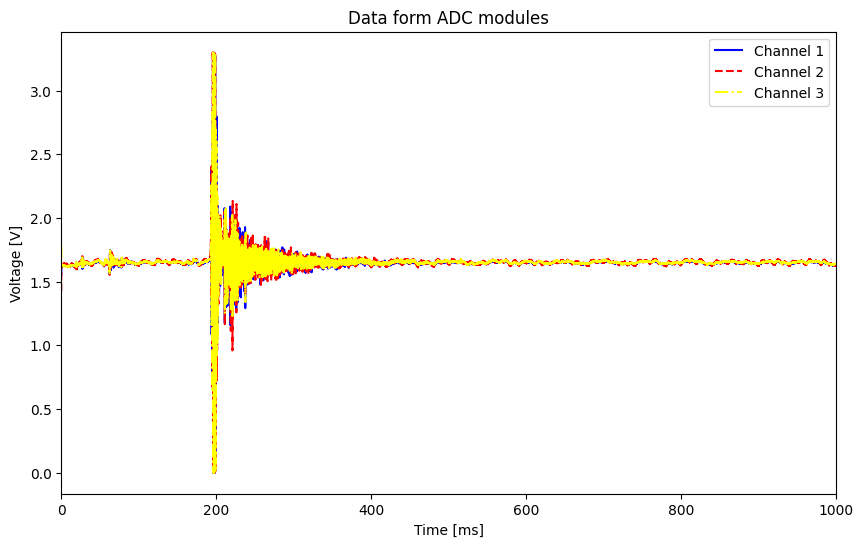

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from raspi_import import raspi_import


channels = 3
#freqIn = 50    #50 Hz
freqIn = 1000   #1 kHz

periodsCount = 10 #How many periods you want to display
periodTime = 1/freqIn  #seconds
rangePeriod = 1

sample_period, data = raspi_import(f'Målinger/Akustikk_klapp2.bin', channels)
time_axis = np.arange(data.shape[0]) * sample_period


print(data.shape)
print(data)

C = 3.3  # volts per count for MCP3201 with Vref = 3.3V
def converter(data): #Convert from counts to volts
    resulution = 2**12
    Vconv = (C/resulution * data)
    return Vconv

plt.figure(figsize=(10, 6))
Type = ["-", "dashed","-."]
colors = ['blue', 'red', 'yellow']
for i in range(channels):
    #plt.plot(time_axis, converter(data[:, i]) + i*C, label=f'Channel {i+1}')
    plt.plot(time_axis, converter(data[:, i]) , label=f'Channel {i+1}', linestyle=Type[i], color=colors[i])
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x*1e3:g}"))

# plt.axhline(y=C, linestyle='--', label="Max voltage, 3.3V")
# plt.axhline(y=C/2, linestyle='--', label="Mid voltage, 1.65V", color='red')
# plt.axhline(y=0, linestyle='--', label="Min voltage, 0V")
#plt.plot(time_axis, data[:, 0], label='Channel 1')
plt.xlim(0, rangePeriod)
#plt.plot(time_axis, data[:, 1], label='Channel 2')
#plt.plot(time_axis, data[:, 2], label='Channel 3')
plt.xlabel("Time [ms]")
plt.ylabel("Voltage [V]")
plt.title("Data form ADC modules")
plt.legend()
plt.show()

#3 subplots :)



In [ ]:
/Users/tordtranum/Desktop/6.semester/Sensorer/Lab/Lab_2_/Målinger